In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
f = file('../dataset/novel.txt', mode='r')
text = f.read()
f.close()

tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=5)
print u'关键词：'
for item in tr4w.get_keywords(10, word_min_len=1):
    print item['word'], item['weight']

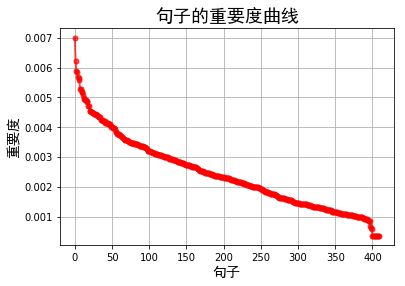

In [6]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source='no_stop_words')
data = pd.DataFrame(data=tr4s.key_sentences)

plt.figure(facecolor='w')
plt.plot(data['weight'], 'ro-', lw=2, ms=5, alpha=0.7)
plt.grid(b=True)
plt.xlabel(u'句子', fontsize=14, fontproperties=fontproperties)
plt.ylabel(u'重要度', fontsize=14, fontproperties=fontproperties)
plt.title(u'句子的重要度曲线', fontsize=18, fontproperties=fontproperties)
plt.show()

In [7]:
key_sentences = tr4s.get_key_sentences(num=20, sentence_min_len=4)
for sentence in key_sentences:
    print sentence['weight'], sentence['sentence']